# Clasificación desequilibrada

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1234)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [2]:
# Cargamos los datos: Convertir las variables a continuas, las númericas sin transformar y las categóricas se codifican

data = pd.read_csv('datos.csv', index_col=False)  
data.head(5)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15119 entries, 0 to 15118
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           15119 non-null  int64  
 1   bathrooms_group    15119 non-null  int64  
 2   log_sqft_living    15119 non-null  float64
 3   log_lot            15119 non-null  float64
 4   sqft_basement_cat  15119 non-null  int64  
 5   waterfront         15119 non-null  int64  
 6   view               15119 non-null  int64  
 7   condition          15119 non-null  int64  
 8   grade_categ        15119 non-null  int64  
 9   lat                15119 non-null  float64
 10  long               15119 non-null  float64
 11  zona               15119 non-null  int64  
 12  yr_renovated_catg  15119 non-null  int64  
 13  price_categ1       15119 non-null  object 
dtypes: float64(4), int64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# Eliminamos algunas variables

data = data.drop(["view", "condition", "lat", "long", "yr_renovated_catg"], axis=1)
data.head(5)

,bedrooms,bathrooms_group,log_sqft_living,log_lot,sqft_basement_cat,waterfront,grade_categ,zona,price_categ1
0,3,0,3.029384,3.681241,1,0,1,1,B1
1,3,0,3.127105,4.803437,0,0,1,1,B1
2,3,0,3.271842,3.697578,1,0,1,2,B1
3,3,0,3.152288,3.610660,0,0,1,2,C1
4,3,1,3.741152,4.544068,1,0,2,2,C1


In [4]:
# Dividimos las variables de entrada y target

y=data.price_categ1
y.head(5)

0    B1
1    B1
2    B1
3    C1
4    C1
Name: price_categ1, dtype: object

In [5]:
# Las variables de entrada numéricas:

X=data.drop("price_categ1", axis=1)
X.head(5)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15119 entries, 0 to 15118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           15119 non-null  int64  
 1   bathrooms_group    15119 non-null  int64  
 2   log_sqft_living    15119 non-null  float64
 3   log_lot            15119 non-null  float64
 4   sqft_basement_cat  15119 non-null  int64  
 5   waterfront         15119 non-null  int64  
 6   grade_categ        15119 non-null  int64  
 7   zona               15119 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 945.1 KB


In [6]:
# Convertimos el target en 0/1

y = y.replace("B1",-1)
y = y.replace("C1",1)
print(y.head(5))


0   -1
1   -1
2   -1
3    1
4    1
Name: price_categ1, dtype: int64


Text(0, 0.5, 'Recuento')

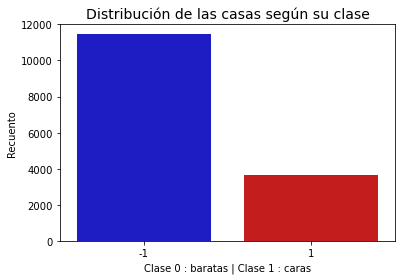

In [7]:
# Distribución del target

colors = ["#0101DF", "#DF0101"]
sns.countplot(y, data=data, palette=colors)
plt.title('Distribución de las casas según su clase', fontsize=14)
plt.xlabel("Clase 0 : baratas | Clase 1 : caras")
plt.ylabel("Recuento")

In [9]:
# Recuento del número de observaciones para cada clase

print('Baratas:', round(data['price_categ1'].value_counts()[0]), round(data['price_categ1'].value_counts()[0]/len(data) * 100,2), '%')
print('Caras:', round(data['price_categ1'].value_counts()[1]),round(data['price_categ1'].value_counts()[1]/len(data) * 100,2), '%')


Baratas: 11448 75.72 %
Caras: 3671 24.28 %


In [10]:
# Resumen de las variables de entrada

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15119 entries, 0 to 15118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           15119 non-null  int64  
 1   bathrooms_group    15119 non-null  int64  
 2   log_sqft_living    15119 non-null  float64
 3   log_lot            15119 non-null  float64
 4   sqft_basement_cat  15119 non-null  int64  
 5   waterfront         15119 non-null  int64  
 6   grade_categ        15119 non-null  int64  
 7   zona               15119 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 945.1 KB


In [11]:
# Dividimos en train, test y validación

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5, random_state=0)

print(X.shape, X_train.shape, X_test.shape, X_val.shape)
print(type(X_train))

print(y.shape, y_train.shape, y_test.shape, y_val.shape)
print(type(y_train))

(15119, 8) (10583, 8) (2268, 8) (2268, 8)
<class 'pandas.core.frame.DataFrame'>
(15119,) (10583,) (2268,) (2268,)
<class 'pandas.core.series.Series'>


In [12]:
print(y_train.value_counts()[-1])

8013


In [13]:
# Distribución de y_train:

print('Baratas:', round(y_train.value_counts()[-1]), round(y_train.value_counts()[-1]/len(y_train) * 100,2), '%')
print('Caras:', round(y_train.value_counts()[1]),round(y_train.value_counts()[1]/len(y_train) * 100,2), '%')

Baratas: 8013 75.72 %
Caras: 2570 24.28 %


In [14]:
# Normalizamos

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Definimos nuestro MLP: 

# -Únicamente tendrá una capa oculta.
# -Número de neuronas de la capa oculta: M.
# -Tasa de aprendizaje: lr.
# -Función de activación: activation.

# El coste subrogado: MSE (coste de Bregman).


def make_model(M, lr, activation):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(M, activation=activation, input_dim=X_train.shape[1]))
    model.add(tf.keras.layers.Dense(1, activation=activation))
    
    model.compile(
        optimizer=keras.optimizers.RMSprop(lr=lr),
        loss=keras.losses.MeanSquaredError() #----> asignar coste para desequilibrio!!!
    )
    
    return model

In [16]:
# Establecemos los parámetros del modelo

M = 10
lr = 0.001

activation = 'tanh' #----> tangente hiperbólica, devuelve valores entre 0 y 1
epochs=300
batch_size=256

model = make_model(M, lr, activation)
model.summary()

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
y_pred_test = model.predict(X_test).ravel()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(y_pred_test)

[-0.9731445  -0.99554205 -0.9325851  ... -0.96412694 -0.96651983
 -0.9942188 ]


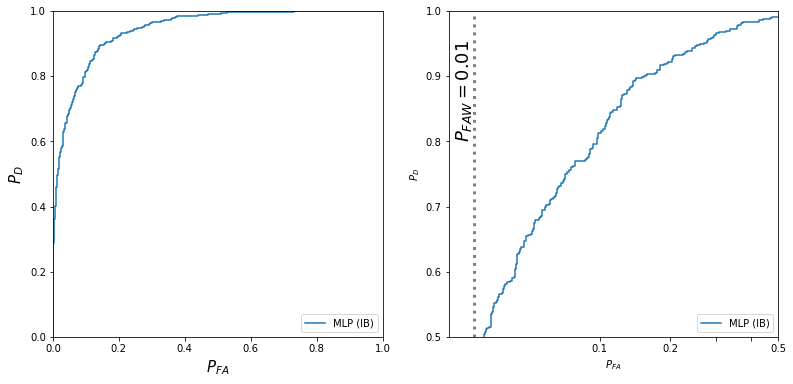

In [18]:
# Curvas ROC

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test, pos_label=1)
plt.figure(figsize = (13, 6))
plt.subplot(121)
plt.axis([0, 1, 0, 1])
plt.plot(fpr, tpr, label='MLP (IB)')
plt.xlabel('$P_{FA}$', fontsize = 15)
plt.ylabel('$P_D$', fontsize = 15)
plt.legend(loc='lower right')
plt.subplot(122)

cte = 20
x_r = [np.log10(1+cte*0.1)/np.log10(1+cte), 
       np.log10(1+cte*0.2)/np.log10(1+cte),
       np.log10(1+cte*0.3)/np.log10(1+cte),
       np.log10(1+cte*0.4)/np.log10(1+cte),
       np.log10(1+cte*0.5)/np.log10(1+cte)]
#fig, ax = plt.subplots(figsize = (10, 10))
plt.axis([0, np.log10(1+cte*0.5)/np.log10(1+cte), 0.5, 1])

plt.axvline(x=np.log10(1+cte*0.01)/np.log10(1+cte), c = 'grey', ls = ':', lw=3)
plt.text(np.log10(1+cte*0.01)/np.log10(1+cte) - 0.01, 0.8, '$P_{FAW}=0.01$', fontsize=18,
               rotation=90, rotation_mode='anchor')
plt.xticks(x_r,[0.1, 0.2, "", "", 0.5, "", "", "", "", 1])
plt.plot(np.log10(1+cte*fpr)/np.log10(1+cte), tpr, label='MLP (IB)')

plt.xlabel('$P_{FA}$')
plt.ylabel('$P_{D}$')
plt.legend()
plt.legend(loc='lower right')
plt.show()

In [20]:
print("Y_test ", y_test.shape)
print("Y_pred_test: ", y_pred_test.shape)

print("minimo: ", min(y_pred_test))
print("maximo: ", max(y_pred_test))

y_pred_test[y_pred_test <0]=-1
y_pred_test[y_pred_test >0]=1

print(y_pred_test)

Y_test  (2268,)
Y_pred_test:  (2268,)
minimo:  -0.9996342
maximo:  0.99971205
[-1. -1. -1. ... -1. -1. -1.]


In [21]:
# Evaluación del modelo:

print("Matriz de confusión: ")
print(confusion_matrix(y_test , y_pred_test))
print("\n")

print("Informe de clasificación: ")
print(classification_report(y_test , y_pred_test))
print("\n")

print("Accuracy: ")
print(accuracy_score(y_test , y_pred_test))
print("\n")

Matriz de confusión: 
[[1630   87]
 [ 165  386]]


Informe de clasificación: 
              precision    recall  f1-score   support

          -1       0.91      0.95      0.93      1717
           1       0.82      0.70      0.75       551

    accuracy                           0.89      2268
   macro avg       0.86      0.82      0.84      2268
weighted avg       0.89      0.89      0.89      2268



Accuracy: 
0.8888888888888888




In [ ]:
# Hacer una prueba más con remuestreo por ejemplo, 
# Cambiando el umbral para la asignación a cada clase o el tipo de coste, o la función de activación para que quede 0/1